### Answers to Assignment 6 of 230E

##### Authors(alphabetic order)
1) Ishan Pathak ishan_pathak@berkeley.edu
2) Leonid Maksymenko leo.maksymenko@berkeley.edu
3) Nymph Qiu nymph_qiu@berkeley.edu
4) Xuanzhong Ren rxz19@berkeley.edu

In [1]:
from datetime import datetime

import numpy as np
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf

import matplotlib.pyplot as plt

from arch import arch_model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Data

In [56]:
sp500 = yf.download('^GSPC', start='1970-01-01', end='2024-04-26')['Adj Close']
ge = yf.download('GE', start='1970-01-01', end='2024-04-26')['Adj Close']

monthly_sp500=sp500.resample('ME').last()
monthly_ge=ge.resample('ME').last()

annualy_sp500=sp500.resample('YE').last()
annualy_ge=ge.resample('YE').last()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [57]:
sp500=np.log(sp500/sp500.shift(1))[1:]
ge=np.log(ge/ge.shift(1))[1:]
monthly_sp500=np.log(monthly_sp500/monthly_sp500.shift(1))[1:]
monthly_ge=np.log(monthly_ge/monthly_ge.shift(1))[1:]
annualy_sp500=np.log(annualy_sp500/annualy_sp500.shift(1))[1:]
annualy_ge=np.log(annualy_ge/annualy_ge.shift(1))[1:]

In [59]:
sp500_monthly_vol=sp500.resample('ME').agg(lambda x: np.sqrt((x**2).mean()*22))
ge_monthly_vol=ge.resample('ME').agg(lambda x: np.sqrt((x**2).mean()*22))

# this is just abs return?
agg_sp500_monthly_vol=monthly_sp500.abs()
agg_ge_monthly_vol=monthly_ge.abs()


### Q1

#### (a)

In [60]:
# figures, axes=plt.subplots(2,2)
# fig, axes = plt.subplots(2, 2, figsize=(12, 8))
print(acf(sp500.dropna(), nlags=5))
print(acf(monthly_sp500.dropna(), nlags=5))
print(acf(annualy_sp500.dropna(), nlags=5))
print(acf(ge.dropna(), nlags=5))
print(acf(monthly_ge.dropna(), nlags=5))
print(acf(annualy_ge.dropna(), nlags=5))

[ 1.         -0.01739987 -0.01435179 -0.00373228 -0.02443656 -0.00482602]
[ 1.          0.02203074 -0.05086682  0.03398881  0.01038939  0.06154224]
[ 1.         -0.06449594 -0.14680203  0.02763828  0.08765153 -0.29266323]
[ 1.00000000e+00  3.72096068e-03 -1.13779901e-02 -1.06743036e-02
  7.33514657e-04 -1.91567102e-02]
[1.         0.07042125 0.00602906 0.02749172 0.07141747 0.04999889]
[ 1.          0.13340579 -0.07729356  0.00458083  0.0913943  -0.24777615]


### (b)

In [61]:
print('i)')
print('annualized daily volatility of S&P 500:', np.sqrt(np.mean(sp500.apply(np.square)))*np.sqrt(252))
print('annualized daily volatility of GE:', np.sqrt(np.mean(ge.apply(np.square)))*np.sqrt(252))
print('ii)')
print('annualized monthly volatility of S&P 500:', np.sqrt(np.mean(monthly_sp500.apply(np.square))*12))
print('annualized monthly volatility of GE:', np.sqrt(np.mean(monthly_ge.apply(np.square))*12))
print('iii)')
print('annualized annual volatility of S&P 500:', np.sqrt(np.mean(annualy_sp500.apply(np.square))))
print('annualized annual volatility of GE:', np.sqrt(np.mean(annualy_ge.apply(np.square))))

i)
annualized daily volatility of S&P 500: 0.17265886634567973
annualized daily volatility of GE: 0.28408052037621245
ii)
annualized monthly volatility of S&P 500: 0.15581128375898012
annualized monthly volatility of GE: 0.26635195880113127
iii)
annualized annual volatility of S&P 500: 0.1817301491943822
annualized annual volatility of GE: 0.31695118837071695


The estimation of std is aggregated from different frequencies, so they are different.

### (c)

In [62]:
def calc_3(df,input):
    print(f'mean of {input}:', df.mean())
    print(f'std of{input}:', df.std())
calc_3(sp500_monthly_vol.dropna(),'S&P 500 monthly volatility')
calc_3(agg_sp500_monthly_vol,'S&P 500 monthly volatility based on daily data')
print()

print('corr between monthly volatility and monthly volatility based on daily data of S&P 500:')
print(np.corrcoef(sp500_monthly_vol.iloc[1:],agg_sp500_monthly_vol)[0,1])
print()

calc_3(ge_monthly_vol,'GE monthly volatility')
calc_3(agg_ge_monthly_vol,'GE monthly volatility based on daily data')
print() 

print('corr between monthly volatility and monthly volatility based on daily data of GE:')
print(np.corrcoef(ge_monthly_vol.iloc[1:],agg_ge_monthly_vol)[0,1])


mean of S&P 500 monthly volatility: 0.04374423446982582
std ofS&P 500 monthly volatility: 0.026012215113680088
mean of S&P 500 monthly volatility based on daily data: 0.03440222540353735
std ofS&P 500 monthly volatility based on daily data: 0.02899784301199057

corr between monthly volatility and monthly volatility based on daily data of S&P 500:
0.5511162110371128

mean of GE monthly volatility: 0.07360714209614172
std ofGE monthly volatility: 0.04044224367138224
mean of GE monthly volatility based on daily data: 0.056187939188254106
std ofGE monthly volatility based on daily data: 0.052527144440871844

corr between monthly volatility and monthly volatility based on daily data of GE:
0.5552165029303809


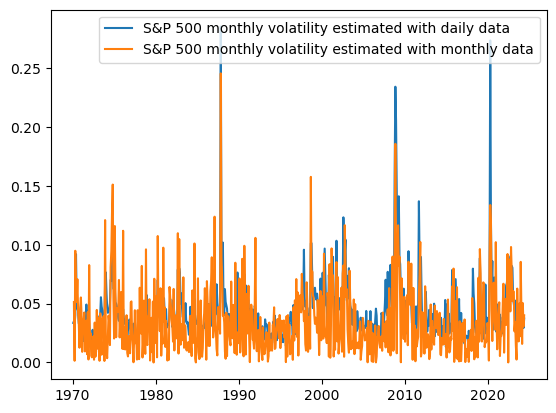

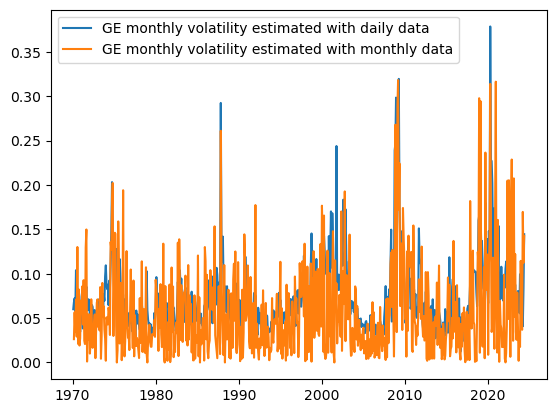

In [10]:
plt.plot(sp500_monthly_vol,label='S&P 500 monthly volatility estimated with daily data')
plt.plot(agg_sp500_monthly_vol,label='S&P 500 monthly volatility estimated with monthly data')
plt.legend()
plt.show()
plt.plot(ge_monthly_vol,label='GE monthly volatility estimated with daily data')
plt.plot(agg_ge_monthly_vol,label='GE monthly volatility estimated with monthly data')
plt.legend()
plt.show()

### (d)(e)(f)

1.We can oberseve obvious lag of prediction compared with the true vol. 2. The prediction value is far more stable and it hardly matches the extreme values.

In [69]:
realized_sp500_monthly_vol=(sp500.resample('ME')).agg(lambda x: np.sqrt((x**2).sum()))
realized_ge_monthly_vol=(ge.resample('ME')).agg(lambda x: np.sqrt((x**2).sum()))
realized_ge_monthly_vol.name=None
realized_sp500_monthly_vol.name=None

                               SARIMAX Results                                
Dep. Variable:              logreturn   No. Observations:                  652
Model:                 ARIMA(1, 0, 0)   Log Likelihood                1605.328
Date:                Mon, 29 Apr 2024   AIC                          -3204.657
Time:                        15:45:10   BIC                          -3191.216
Sample:                             0   HQIC                         -3199.444
                                - 652                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0427      0.003     13.312      0.000       0.036       0.049
ar.L1          0.5947      0.014     41.306      0.000       0.566       0.623
sigma2         0.0004   6.78e-06     62.688      0.0

/Users/nymphqiu/anaconda3/envs/mfe230e/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


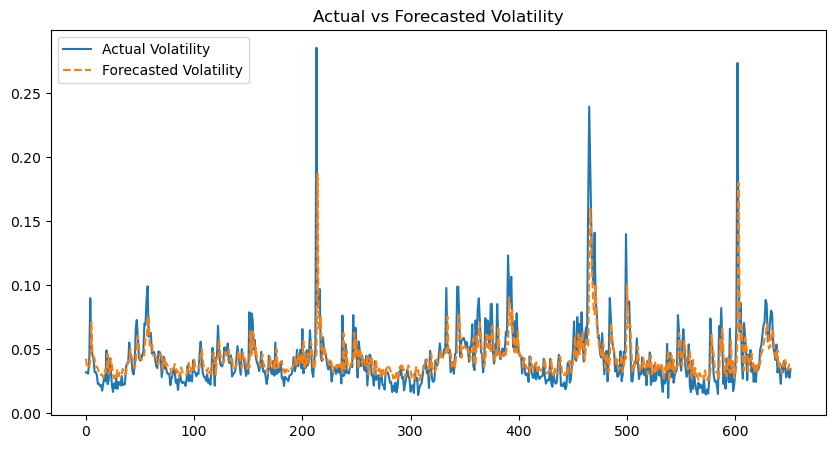

AR MSE: 0.00042529857483267637
AR MAE: 0.011616896332774473


In [70]:
def pipeline4(data):

    data = pd.DataFrame(data.values, columns=['logreturn'])

    model = ARIMA(data['logreturn'], order=(1,0,0))
    model_fitted = model.fit(method_kwargs={'maxiter':0})
    print(model_fitted.summary() )
    data['forecast'] = model_fitted.fittedvalues

    mse = np.mean(np.square(data['logreturn'] - data['forecast']))
    mae = np.mean(np.abs(data['logreturn'] - data['forecast']))
    plt.figure(figsize=(10,5))
    plt.plot(data['logreturn'], label='Actual Volatility')
    plt.plot(data['forecast'], label='Forecasted Volatility', linestyle='--')
    plt.legend()
    plt.title('Actual vs Forecasted Volatility')
    plt.show()
    print('AR MSE:', mse)
    print('AR MAE:', mae)
    
pipeline4(realized_sp500_monthly_vol)

                               SARIMAX Results                                
Dep. Variable:              logreturn   No. Observations:                  652
Model:                 ARIMA(1, 0, 0)   Log Likelihood                1394.384
Date:                Mon, 29 Apr 2024   AIC                          -2782.768
Time:                        15:45:12   BIC                          -2769.328
Sample:                             0   HQIC                         -2777.556
                                - 652                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0719      0.005     13.895      0.000       0.062       0.082
ar.L1          0.6940      0.019     37.459      0.000       0.658       0.730
sigma2         0.0008   1.69e-05     47.886      0.0

/Users/nymphqiu/anaconda3/envs/mfe230e/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


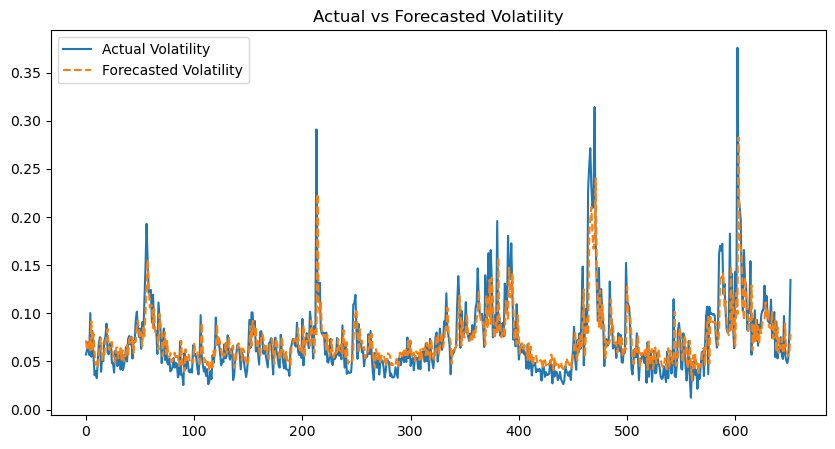

AR MSE: 0.0008120563101547555
AR MAE: 0.01835870267147528


In [71]:
pipeline4(realized_ge_monthly_vol)

In [72]:
monthly_sp500.name=None
monthly_ge.name=None
monthly_sp500=pd.DataFrame(monthly_sp500,columns=['logreturn'])
monthly_sp500['realized_vol']=realized_sp500_monthly_vol.iloc[1:]
monthly_ge=pd.DataFrame(monthly_ge,columns=['logreturn'])
monthly_ge['realized_vol']=realized_ge_monthly_vol.iloc[1:]

### Q2

#### (a) (b) (c)

Observations:<br>
1.The model still cannot capture the extreme values <br>
2.RMSE is even smaller than AR model.<br>
For both S&P500 and GE, $\alpha+\beta < 1$ this suggests that $\sigma_t^2$ is stationary.<br>
Besides, both $\alpha$ and $\beta $ are significant for both equities.<br>

Please note that we used monthly realized vol via formula $\sum r_i^2$ where daily return is $r_i$

Iteration:      5,   Func. Count:     39,   Neg. LLF: -1080.248034319472
Iteration:     10,   Func. Count:     73,   Neg. LLF: -1126.1507130775826
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1127.0120365819423
            Iterations: 15
            Function evaluations: 96
            Gradient evaluations: 14
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              logreturn   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1127.01
Distribution:                  Normal   AIC:                          -2246.02
Method:            Maximum Likelihood   BIC:                          -2228.11
                                        No. Observations:                  651
Date:                Mon, Apr 29 2024   Df Residuals:                      650
Time:     

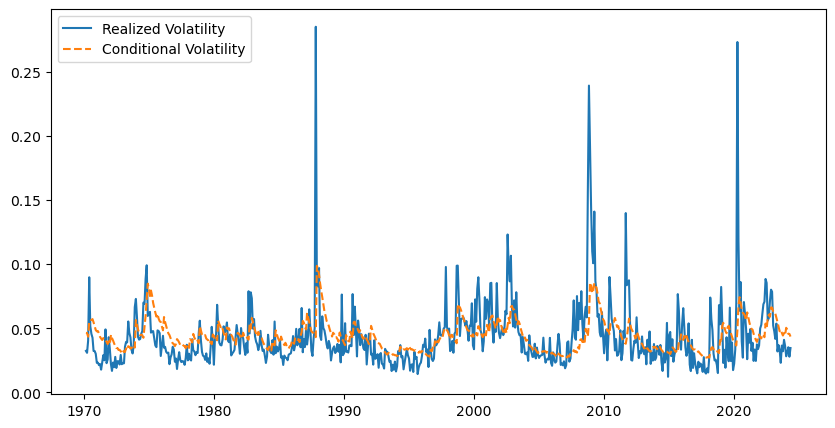

GARCH RMSE: 0.02283548289593237
GARCH MAE: 0.01363984404729815


In [102]:

def garch_1_1(data):
    garch_model = arch_model(data['logreturn'], mean='constant',vol='Garch', p=1, q=1,rescale=False)
    garch_result = garch_model.fit(update_freq=5)

    # Print out the summary of the GARCH model to see the parameters.
    print(garch_result.summary())

    # Use the model to estimate the conditional volatility.
    data['conditional_volatility'] = (garch_result.conditional_volatility)

    # Plot the realized volatility against the conditional volatility.
    plt.figure(figsize=(10,5))
    plt.plot(data.index, data['realized_vol'], label='Realized Volatility')
    plt.plot(data.index, data['conditional_volatility'], label='Conditional Volatility', linestyle='--')
    plt.legend()
    plt.show()

    # Calculate the RMSE for the GARCH model forecasts.
    garch_rmse = np.sqrt(np.mean(np.square(data['realized_vol'] - data['conditional_volatility'])))
    garch_mae = np.mean(np.abs(data['realized_vol'] - data['conditional_volatility']))
    print('GARCH RMSE:', garch_rmse)
    print('GARCH MAE:', garch_mae)
garch_1_1(monthly_sp500)


Iteration:      5,   Func. Count:     41,   Neg. LLF: -803.9444764409025
Optimization terminated successfully    (Exit mode 0)
            Current function value: -807.5632039148437
            Iterations: 9
            Function evaluations: 62
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              logreturn   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                807.563
Distribution:                  Normal   AIC:                          -1607.13
Method:            Maximum Likelihood   BIC:                          -1589.21
                                        No. Observations:                  651
Date:                Mon, Apr 29 2024   Df Residuals:                      650
Time:                        16:05:26   Df Model:                            1
        

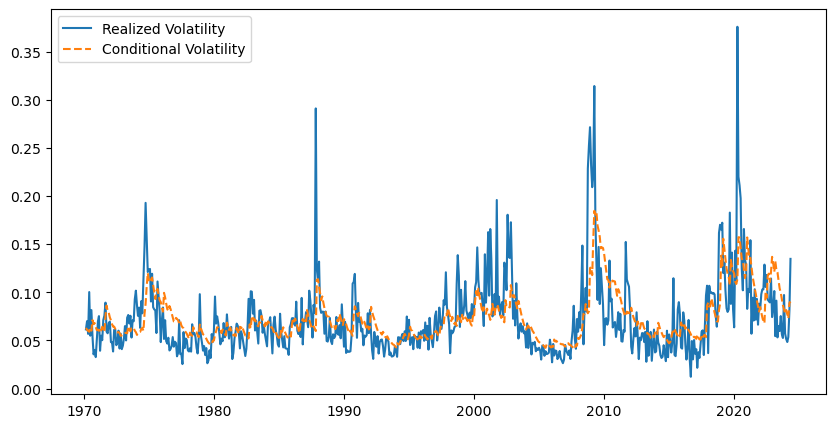

GARCH RMSE: 0.03216777272420523
GARCH MAE: 0.021118974811267305


In [103]:
garch_1_1(monthly_ge)

### (d)

In [94]:
def select_best_garch_p_q(data):
    # data=pd.DataFrame(data,columns=['logreturn'])
    best_aic = np.inf
    best_order = None
    for p in range(1, 6):
        for q in range(1, 6):
            try:
                garch_model = arch_model(data['logreturn'], vol='Garch', p=p, q=q,rescale=False)
                garch_result = garch_model.fit(disp='off')
                aic = garch_result.aic
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, q)
            except:
                pass
    print('Best AIC:', best_aic)
    print('Best Order:', best_order)
select_best_garch_p_q(monthly_sp500)

Best AIC: -2247.9254802810074
Best Order: (3, 3)


In [95]:
select_best_garch_p_q(monthly_ge)

Best AIC: -1608.6950130190057
Best Order: (2, 2)


###  Q3 

#### (a)(b)(c)

Iteration:      5,   Func. Count:     44,   Neg. LLF: -1063.828112970199
Iteration:     10,   Func. Count:     77,   Neg. LLF: -1134.0143203603639
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1134.0143854452176
            Iterations: 12
            Function evaluations: 90
            Gradient evaluations: 12
                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:              logreturn   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:                1134.01
Distribution:                  Normal   AIC:                          -2258.03
Method:            Maximum Likelihood   BIC:                          -2235.64
                                        No. Observations:                  651
Date:                Mon, Apr 29 2024   Df Residuals:                      650
Time:     

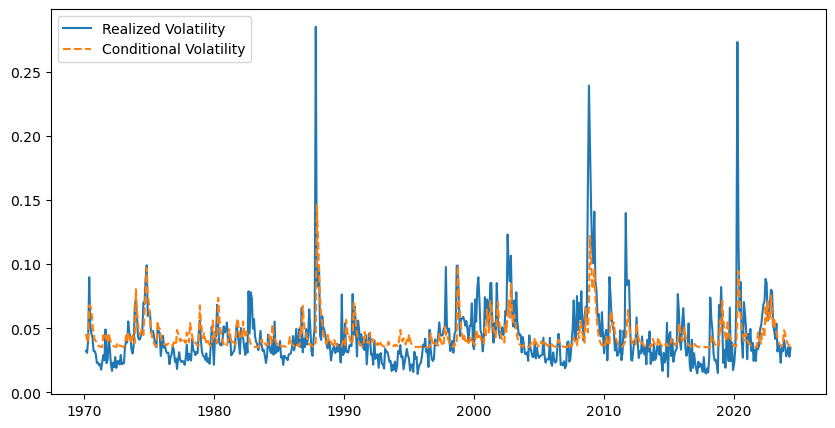

GJR GARCH RMSE: 0.021461934765013995
GJR GARCH MAE: 0.012799706210343435


In [96]:
def gjr_garch_1_1(data): # only change is the o=0 parameter
    garch_model = arch_model(data['logreturn'], mean='constant',vol='Garch', p=1,o=1, q=1,rescale=False)
    garch_result = garch_model.fit(update_freq=5)

    # Print out the summary of the GARCH model to see the parameters.
    print(garch_result.summary())

    # Use the model to estimate the conditional volatility.
    data['conditional_volatility'] = (garch_result.conditional_volatility)

    # Plot the realized volatility against the conditional volatility.
    plt.figure(figsize=(10,5))
    plt.plot(data.index, data['realized_vol'], label='Realized Volatility')
    plt.plot(data.index, data['conditional_volatility'], label='Conditional Volatility', linestyle='--')
    plt.legend()
    plt.show()

    # Calculate the RMSE for the GARCH model forecasts.
    garch_rmse = np.sqrt(np.mean(np.square(data['realized_vol'] - data['conditional_volatility'])))
    garch_mae = np.mean(np.abs(data['realized_vol'] - data['conditional_volatility']))
    print('GJR GARCH RMSE:', garch_rmse)
    print('GJR GARCH MAE:', garch_mae)
gjr_garch_1_1(monthly_sp500)

Iteration:      5,   Func. Count:     45,   Neg. LLF: -758.9952727749192
Iteration:     10,   Func. Count:     82,   Neg. LLF: -810.4169306930014
Iteration:     15,   Func. Count:    117,   Neg. LLF: -814.3191204220241
Optimization terminated successfully    (Exit mode 0)
            Current function value: -814.3191204220241
            Iterations: 16
            Function evaluations: 117
            Gradient evaluations: 15
                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:              logreturn   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:                814.319
Distribution:                  Normal   AIC:                          -1618.64
Method:            Maximum Likelihood   BIC:                          -1596.25
                                        No. Observations:                  651
Date:            

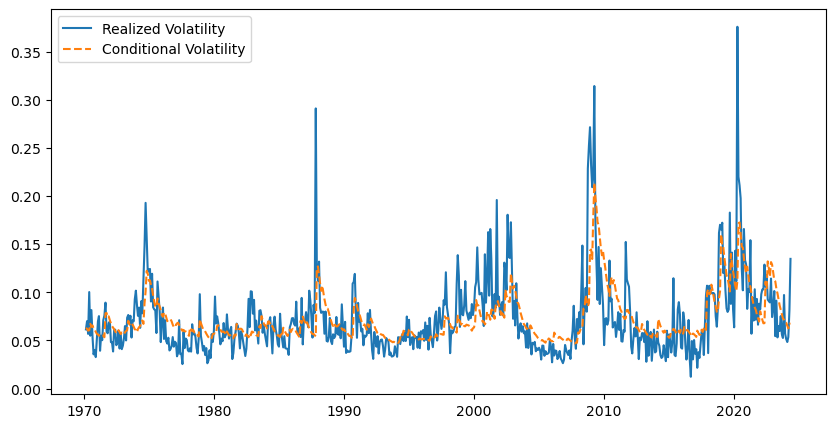

GJR GARCH RMSE: 0.030472271495736145
GJR GARCH MAE: 0.020071110215272435


In [97]:
gjr_garch_1_1(monthly_ge)

#### (d)

In [98]:
def select_best_gjr_garch_p_o_q(data):
    # data=pd.DataFrame(data,columns=['logreturn'])
    best_aic = np.inf
    best_order = None
    for p in range(1, 6):
        for q in range(1, 6):
            for o in range(1, 6):
                try:
                    garch_model = arch_model(data['logreturn'], vol='Garch', p=p, o=o, q=q, rescale=False)
                    garch_result = garch_model.fit(disp='off')
                    aic = garch_result.aic
                    if aic < best_aic:
                        best_aic = aic
                        best_order = (p, o, q)
                except:
                    pass
    print('Best AIC:', best_aic)
    print('Best Order:', best_order)
select_best_gjr_garch_p_o_q(monthly_sp500)
select_best_gjr_garch_p_o_q(monthly_ge)

Best AIC: -2267.1028610892554
Best Order: (3, 3, 3)
Best AIC: -1623.3127478429178
Best Order: (3, 3, 2)


# 4

Sp 500:  
....AR MSE: 0.0019827771417819237  
....AR MAE: 0.033499944450777835  
  
GE:  
....AR MSE: 7.540123687400394e-05  
....AR MAE: 0.0037053382075967933  
  
Sp500:  
....GARCH RMSE: 0.005324049687354842  
....GARCH MAE: 0.001580150380844224  
  
GE:  
....GARCH RMSE: 0.009325482165693106  
....GARCH MAE: 0.003937626612335591  
  
SP500:  
....GJR GARCH RMSE: 0.00516012851126617  
....GJR GARCH MAE: 0.0014624348693186339  
  
GE:  
....GJR GARCH RMSE: 0.008884724399105181  
....GJR GARCH MAE: 0.0036832027039727325  

We see that the 